In [1]:
import time
import math
import numpy as np
import pandas as pd
import sympy as sy
from matplotlib import pyplot as plt
from sympy.utilities.lambdify import lambdify
from autograd import grad
import autograd.numpy as anp
from autograd import multigrad
from autograd import elementwise_grad
from autograd import jacobian
from sympy.matrices import *

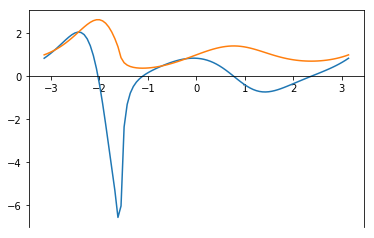

In [14]:
""" Problem 1 """

def func(xvals):
    return (np.sin(xvals) + 1) ** np.sin(np.cos(xvals))

x = sy.symbols('x')
f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
f1 = sy.diff(f, x) 
fprime = lambdify(x, f1, 'numpy')

xvals = np.linspace(-np.pi, np.pi, 100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals, fprime(xvals))
ax.plot(xvals, func(xvals))
plt.show()

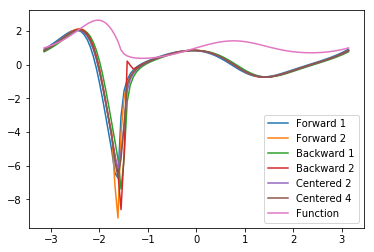

In [15]:
""" Problem 2 """

def forward1(f, x, h):
    return (f(x + h) - f(x))/h

def forward2(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h))/(2*h)

def backward1(f, x, h):
    return (f(x) - f(x - h))/h

def backward2(f, x, h):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h))/(2*h)

def centered2(f, x, h):
    return (f(x + h)- f(x - h))/(2*h)

def centered4(f, x, h):
    return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h))/(12*h)

h = 0.1

plt.plot(xvals, forward1(func, xvals, h), label = "Forward 1")
plt.plot(xvals, forward2(func, xvals, h), label = "Forward 2")
plt.plot(xvals, backward1(func, xvals, h), label = "Backward 1")
plt.plot(xvals, backward2(func, xvals, h), label = "Backward 2")
plt.plot(xvals, centered2(func, xvals, h), label = "Centered 2")
plt.plot(xvals, centered4(func, xvals, h), label = "Centered 4")
plt.plot(xvals, func(xvals), label = "Function")
plt.legend()
plt.show()

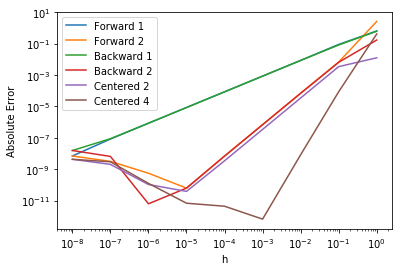

In [16]:
""" Problem 3 """

def f1error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - forward1(f, x, hvals[i]))
    return error

def f2error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - forward2(f, x, hvals[i]))
    return error    

def b1error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - backward1(f, x, hvals[i]))
    return error  

def b2error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - backward2(f, x, hvals[i]))
    return error

def c2error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - centered2(f, x, hvals[i]))
    return error    

def c4error(f, x, hvals):
    error = np.zeros((len(hvals), 100))
    for i in range(len(hvals)):
        error[i, :]  = abs(fprime(x) - centered4(f, x, hvals[i]))
    return error

hvals = np.logspace(-8,0,9)
plt.loglog(hvals, f1error(func, xvals, hvals)[:,1], label = "Forward 1")
plt.loglog(hvals, f2error(func, xvals, hvals)[:,1], label = "Forward 2")
plt.loglog(hvals, b1error(func, xvals, hvals)[:,1], label = "Backward 1")
plt.loglog(hvals, b2error(func, xvals, hvals)[:,1], label = "Backward 2")
plt.loglog(hvals, c2error(func, xvals, hvals)[:,1], label = "Centered 2")
plt.loglog(hvals, c4error(func, xvals, hvals)[:,1], label = "Centered 4")
plt.legend(loc = "best")
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.show()

In [6]:
""" Problem 4 """

data = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk4_DifIntOpt/plane.npy")
alpha = data[:,1]
beta  = data[:,2]
alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)
a = 500
x = a*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
y = a*np.tan(alpha)*np.tan(beta)/(np.tan(beta) - np.tan(alpha))
xprime = np.zeros(len(x))
yprime = np.zeros(len(x))
for i in range(len(x)):
    if i == 0: 
        xprime[0] = (x[1] - x[0])
        yprime[0] = (y[1] - y[0])
    elif i == 7:
        xprime[7] = (x[7] - x[6])
        yprime[7] = (y[7] - y[6])
    else:
        xprime[i] = (x[i+1] - x[i-1])/2
        yprime[i] = (y[i+1] - y[i-1])/2

speed = np.sqrt(xprime ** 2 + yprime ** 2)
print(speed)

[ 46.42420062  47.00103938  48.99880514  50.09944163  48.29035084
  51.56455905  53.92303355  51.51480057]


In [74]:
""" Problem 5 """

def my_jacobian(f, x, h):
    m = f(x).shape[0]
    n = x.shape[0]
    jac = np.zeros((m,n))
    I = np.eye(n)
    for i in range(m):
        for j in range(n):
            ej  = I[j, :]
            jac[i,j] = (f(x+h*ej)[i] - f(x - h*ej)[i])/(2*h)  
    return jac

In [81]:
""" Problem 6 """

x = sy.symbols('x')
x0 = np.pi/4

start = time.time()
g = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
g1 = sy.diff(g, x)
gprime = lambdify(x, g,'numpy')
deriv = gprime(x0)
end = time.time()
print("Sy time:", start - end)

start = time.time()
g = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
grad_g = grad(g)
error = abs(deriv - grad_g(x0))
end = time.time()
print("Aut0 time:", start - end)
print("Autograd Error:", error )

start = time.time()
g = lambda x: np.log(np.sqrt(np.sin(np.sqrt(x))))
error = abs(deriv - centered2(g, x0, h))
end = time.time()
print("Centered time:", start - end)
print("Centered2 Error:", error )


Sy time: -0.0060749053955078125
Aut0 time: -0.0008749961853027344
Autograd Error: 0.357904270166
Centered time: -0.0001537799835205078
Centered2 Error: 0.359639023935


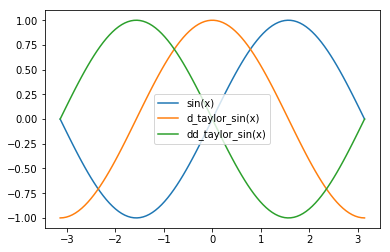

In [61]:
""" Problem 7 """

def taylor_sin(x, tol=.0001):
    result = 0
    cur_term = x
    i=0
    while anp.abs(cur_term) >= tol:
        cur_term = ((-1) ** (i)) * (x ** (2*i+1))/np.math.factorial(2*i+1)
        result += cur_term
        i += 1
    return result


d_taylor_sin = grad(taylor_sin)
dd_taylor_sin = grad(d_taylor_sin)
x = np.linspace(-np.pi, np.pi, 100)

prime1 =[]
for i in range(len(x)):
    prime1.append(d_taylor_sin(x[i]))
    
prime2 =[]
for i in range(len(x)):
    prime2.append(dd_taylor_sin(x[i]))

plt.plot(x, np.sin(x), label = "sin(x)")
plt.plot(x, prime1, label = "d_taylor_sin(x)")
plt.plot(x, prime2, label = "dd_taylor_sin(x)")
plt.legend()
plt.show()

In [82]:
""" Problem 8 """

x, y = sy.symbols('x y')
fx = sy.exp(x) * sy.sin(y) + y**3
fy = 3*y - sy.cos(x)
f = Matrix([fx, fy])

start = time.time()
jac_sy = f.jacobian((x,y))
jacobian_sym = lambdify((x,y), jac_sy ,'numpy')
end = time.time()
print("Sy time:", end - start)
print(jacobian_sym(1,1))

start = time.time()
f = lambda x: np.array([np.exp(x[0]) * np.sin(x[1]) + (x[1])**3, 3 * x[1] - np.cos(x[0])])
x = np.array([1,1])
end = time.time()
print("Centered time:", end - start)
print(my_jacobian(f,x,h))

start = time.time()
f = lambda x: anp.array([anp.exp(x[0]) * anp.sin(x[1]) + (x[1])**3, 3 * x[1] - anp.cos(x[0])])
jacobian_anp = jacobian(f)
end = time.time()
print("Auto time:", end - start)
print(jacobian_anp(anp.array([1.,1.])))


Sy time: 0.005106925964355469
[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
Centered time: 0.0003228187561035156
[[ 2.29116945  4.47624734]
 [ 0.84006923  3.        ]]
Auto time: 0.00018477439880371094
[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
